In [112]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('C:\\Users\\ryan\\Desktop\\Thinkful DS Sample Data - Main Course\\Unit 2\\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')

In [114]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [115]:
#Remove commas from numbers, remove spaces before and after entries (if they exist)
for col in df.columns:
    df[col]= df[col].apply(lambda x: str(x).replace(',', ''))
    df[col]= df[col].apply(lambda x: str(x).strip())

#Convert str cols to float so we can do some graphing
numerical_columns = df.columns[1:]
for num_col in numerical_columns:
    df[num_col]= df[num_col].apply(lambda x: float(x))

In [116]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


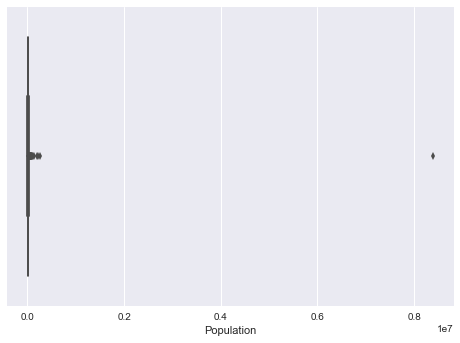

In [117]:
#Focus on Population, Murder, and Robbery, as these vars will be used in final model. Do we need to do any further data cleaning?

sns.boxplot(df.Population)
plt.show()

In [118]:
#Clearly there is an outlier datapoint for population (New York City) - but how do we handle. Drop from model? Scale down by 10X?
#Scale down by 100X?

In [119]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


In [120]:
df[df['City'] == 'New York']

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
216,New York,8396126.0,52384.0,335.0,NaN,1112.0,19170.0,31767.0,141971.0,16606.0,117931.0,7434.0,NaN


In [121]:
rob_bin = []
murder = []

for row in range(len(df)):
    if df['Robbery'][row] > 0:
        rob_bin.append(1)
    else: 
        rob_bin.append(0)
        
for row in range(len(df)):
    if df['Murder and\nnonnegligent\nmanslaughter'][row] > 0:
        murder.append(1)
    else: 
        murder.append(0)
        
df['Robbery_Binary'] = rob_bin
df['Murder_Binary'] = murder

In [122]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson,Robbery_Binary,Murder_Binary
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0,0,0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0,0,0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0,0,0
3,Albany,97956.0,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN,1,1
4,Albion Village,6388.0,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN,1,0


In [123]:
df2 = pd.DataFrame()
df2['City'] = df['City']
df2['Population'] = df['Population']
df2['Population_Sq'] = df['Population'] * df['Population']
df2['Robbery_Binary'] = df['Robbery_Binary']
df2['Murder_Binary'] = df['Murder_Binary']

In [124]:
df2.head()

,City,Population,Population_Sq,Robbery_Binary,Murder_Binary
0,Adams Village,1861.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,6.640929e+06,0,0
2,Akron Village,2846.0,8.099716e+06,0,0
3,Albany,97956.0,9.595378e+09,1,1
4,Albion Village,6388.0,4.080654e+07,1,0


In [ ]:
#What to do about "New York" with huge population?